# Interatomic force field (IFF) optimization for W-based metal alloys

## Input data preparation

Author: Lukas Vlcek

Start Date: 2018-04-22

### Explore spline potentials

In [1]:
%matplotlib inline
import sys
import re
import numpy as np
import matplotlib.pyplot as plt

### Tungsten EAM IFF functions and parameters from Marinica et al. (corrected)

In [21]:
# Gauge conversion perameters
C = 1.848055990
S = 2.232322602e-1

# electronic density function (cubic splines)
rho = lambda r, a, k: sum([c*(p - r)**3 for c, p in zip(a, k) if r < p])

# embedding function
F = lambda d, a: a[0]*d**0.5 + a[1]*d + a[2]*d**2

Fc = lambda d, a: a[0] + a[1]*d + a[2]*d**2 + a[3]*d**3
Fe = lambda d, a: F(d/S, a) + C/S*d
Fa = lambda d, a1, a2: Fe(d, a1) if d < 1.359141225 else Fc(d, a2)

# pair potential function (same spline form as electronic density)
V = rho

In [22]:
# electronic density parameters
rho_re_a = [3.704045964e-3]
rho_re_r = [5.46]

# embeding function parameters
F_re_a = [-7.046791948, 1.23658472, 1.143405627]
#F_re_a = [-7.046791948, 0, 1.143405627]

# pair potential
V_re_a = [6.726805309, 3.217593889, -6.545857587e-1, 1.453229484e-1, -2.063629464e-1, 6.114909116e-2]
V_re_r = [2.7, 3.252, 3.804, 4.356, 4.908, 5.46]

In [23]:
def utot_re(x):
    u = 6*V(x, V_re_a, V_re_r)
    d = 12*rho(x, rho_re_a, rho_re_r)
    u += F(d, F_re_a)
    return u/12

def u_manybody_re(x):
    d = 12*rho(x, rho_re_a, rho_re_r)
    u = F(d, F_re_a)
    return u/12

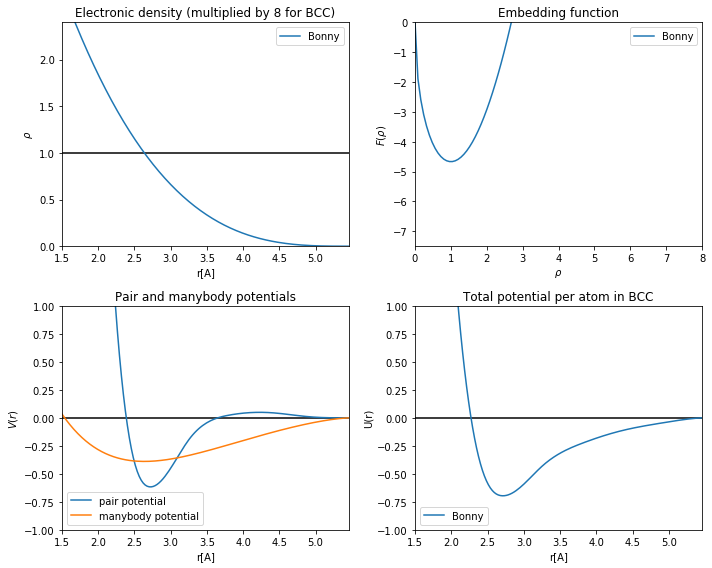

In [24]:
# plot the functions and potentials
rcut = 5.46
r = np.linspace(0., rcut, 201)

plt.figure(figsize=(10,8))

# Electronic density
dens = [rho(x, rho_re_a, rho_re_r)*12 for x in r]
plt.subplot(221)
plt.title('Electronic density (multiplied by 8 for BCC)')
plt.plot(r, dens, label='Bonny')
plt.legend()
plt.hlines(1.0, 1.5, rcut)
plt.axis([1.5, rcut, 0, 0.3*8])
plt.xlabel('r[A]')
plt.ylabel(r'$ \rho $')

# Embedding function
dens = np.linspace(0., 8., 101)
embed = [F(d, F_re_a) for d in dens]
plt.subplot(222)
plt.title('Embedding function')
plt.plot(dens, embed, label='Bonny')
plt.legend()
plt.axis([0, 8, -7.5, 0.0])
plt.xlabel(r'$\rho$')
plt.ylabel(r'$F(\rho)$')

# Pair and manybody potentials
pot = [V(x, V_re_a, V_re_r) for x in r]
pot_manybody = [u_manybody_re(x) for x in r]
plt.subplot(223)
plt.title('Pair and manybody potentials')
plt.plot(r, pot, label='pair potential')
plt.plot(r, pot_manybody, label='manybody potential')
plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1.0, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'$V(r)$')

# Total potential per atom (bulk)
pot = [utot_re(x) for x in r]
plt.subplot(224)
plt.title('Total potential per atom in BCC')
plt.plot(r, pot, label='Bonny')
plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'U(r)')

plt.tight_layout()

In [25]:
# electronic density parameters
rho_x_a = [3.704045964e-3]
rho_x_r = [4.77]

# embeding function parameters
F_x_a = [-7.046791948, 1.23658472, 1.143405627]
#F_re_a = [-7.046791948, 0, 1.143405627]

#3.704045964e-3

# pair potential
V_x_a = [6.726805309, 3.217593889, -6.545857587e-1, 1.453229484e-1, -2.063629464e-1, 6.114909116e-2]
V_x_a = [x*2 for x in V_re_a]
#V_re_r = [2.7, 3.252, 3.804, 4.356, 4.908, 5.46]
V_x_r = [2.56, 2.73, 3.252, 3.804, 4.20, 4.77]


In [19]:
def utot_re(x):
    u = 6*V(x, V_re_a, V_re_r)
    d = 12*rho(x, rho_re_a, rho_re_r)
    u += F(d, F_re_a)
    return u/12

def u_manybody_re(x):
    d = 12*rho(x, rho_re_a, rho_re_r)
    u = F(d, F_re_a)
    return u/12


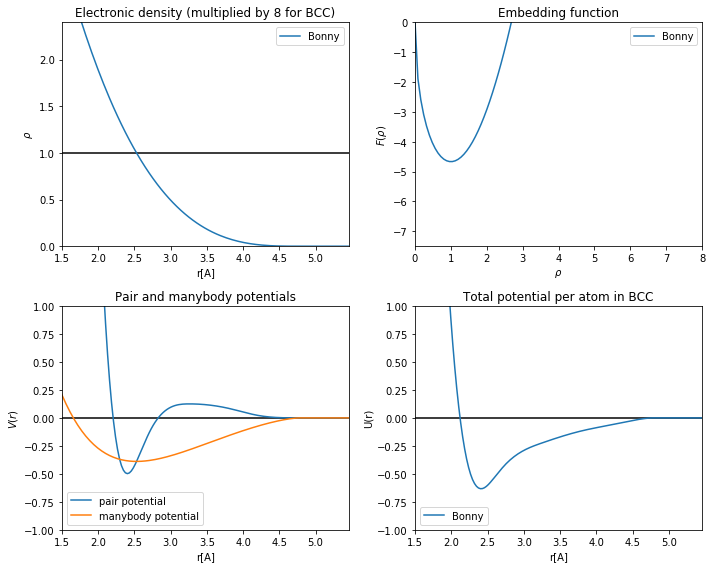

In [20]:
# plot the functions and potentials
rcut = 5.46
r = np.linspace(0., rcut, 201)

plt.figure(figsize=(10,8))

# Electronic density
dens = [rho(x, rho_re_a, rho_re_r)*12 for x in r]
plt.subplot(221)
plt.title('Electronic density (multiplied by 8 for BCC)')
plt.plot(r, dens, label='Bonny')
plt.legend()
plt.hlines(1.0, 1.5, rcut)
plt.axis([1.5, rcut, 0, 0.3*8])
plt.xlabel('r[A]')
plt.ylabel(r'$ \rho $')

# Embedding function
dens = np.linspace(0., 8., 101)
embed = [F(d, F_re_a) for d in dens]
plt.subplot(222)
plt.title('Embedding function')
plt.plot(dens, embed, label='Bonny')
plt.legend()
plt.axis([0, 8, -7.5, 0.0])
plt.xlabel(r'$\rho$')
plt.ylabel(r'$F(\rho)$')

# Pair and manybody potentials
pot = [V(x, V_re_a, V_re_r) for x in r]
pot_manybody = [u_manybody_re(x) for x in r]
plt.subplot(223)
plt.title('Pair and manybody potentials')
plt.plot(r, pot, label='pair potential')
plt.plot(r, pot_manybody, label='manybody potential')
plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1.0, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'$V(r)$')

# Total potential per atom (bulk)
pot = [utot_re(x) for x in r]
plt.subplot(224)
plt.title('Total potential per atom in BCC')
plt.plot(r, pot, label='Bonny')
plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'U(r)')

plt.tight_layout()

In [33]:
# fit pair potential
def udif(p, r):
    uref = [V(x, V_re_a, V_re_r) for x in r]
    utry = [V(x, p, V_x_r) for x in r]
    return uref, utry

def uloss(p, r):
    uref = [V(x, V_re_a, V_re_r) for x in r]
    utry = [V(x, p, V_x_r) for x in r]
    loss = sum([(a-b)**2 for a, b in zip(uref, utry)])
    return loss

In [72]:
from scipy.optimize import fmin
par_in = V_x_a
output = fmin(uloss, par_in, args=(r,), maxiter=100000, maxfun=100000, disp=0, full_output=1,ftol=1e-6)
pair_new = output[0]
print(*pair_new)

-0.17418264522 7.68130608637 1.69215659358 0.897809491572 -0.939438008064 0.121722065615


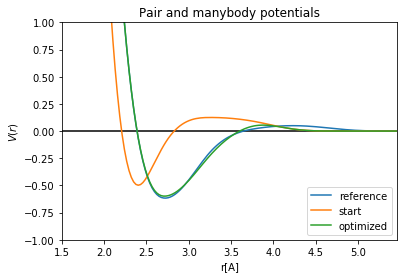

In [90]:
rcut = 5.46
r = np.linspace(0., rcut, 201)

uref, utry = udif(V_x_a, r)
uref, uopt = udif(pair_new, r)

plt.title('Pair and manybody potentials')
plt.plot(r, uref, label='reference')
plt.plot(r, utry, label='start')
plt.plot(r, uopt, label='optimized')

plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1.0, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'$V(r)$')

In [65]:
# fit manybody potential
def u_manybody_dif(p, r):
    uref = [F(12*rho(x, rho_re_a, rho_re_r), F_re_a)/12 for x in r]
    utry = [F(12*rho(x, rho_x_a, rho_x_r), p)/12 for x in r]
    return uref, utry

def u_manybody_loss(p, r):
    uref = [F(12*rho(x, rho_re_a, rho_re_r), F_re_a)/12 for x in r]
    utry = [F(12*rho(x, rho_x_a, rho_x_r), p)/12 for x in r]
    loss = sum([(a-b)**2 for a, b in zip(uref, utry)])
    return loss

In [74]:
rho_x_a = [3.704045964e-3]
rho_x_a = [1.0]
r = np.linspace(0., rcut, 201)
par_in = F_re_a
output = fmin(u_manybody_loss, par_in, args=(r,), maxiter=100000, maxfun=100000, disp=0, full_output=1,ftol=1e-6)
many_new = output[0]
print(*many_new)

-0.827564445229 0.0320468541316 2.22248338771e-05


[-7.046791948, 1.23658472, 1.143405627]


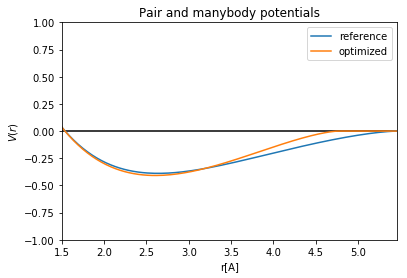

In [89]:
rcut = 5.46
r = np.linspace(0., rcut, 201)
print(F_re_a)
uref, utry = u_manybody_dif(F_re_a, r)
uref, uopt = u_manybody_dif(many_new, r)

plt.title('Pair and manybody potentials')
plt.plot(r, uref, label='reference')
#plt.plot(r, utry, label='start')
plt.plot(r, uopt, label='optimized')

plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1.0, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'$V(r)$')

In [88]:
print(pair_new)
print(many_new)

[-0.17418265  7.68130609  1.69215659  0.89780949 -0.93943801  0.12172207]
[ -8.27564445e-01   3.20468541e-02   2.22248339e-05]


In [94]:
def utot_opt(x, pn, mn):
    u = 6*V(x, pn, V_x_r)
    d = 12*rho(x, rho_x_a, rho_x_r)
    u += F(d, mn)
    return u/12

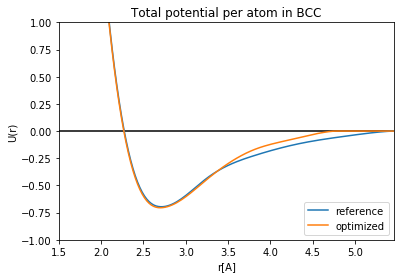

In [96]:
pot = [utot_re(x) for x in r]
pot_new = [utot_opt(x, pair_new, many_new) for x in r]

plt.title('Total potential per atom in BCC')
plt.plot(r, pot, label='reference')
plt.plot(r, pot_new, label='optimized')
plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'U(r)')

In [106]:
# modified functions
many_x = [x for x in many_new]
many_x[1] = 0.0

pair_x = [x for x in pair_new]
pair_x[-1] += 2*many_new[1]

In [108]:
print(pair_x)
print(many_x)

[-0.17418264521969035, 7.6813060863722065, 1.6921565935750296, 0.89780949157203727, -0.93943800806449307, 0.18581577387791415]
[-0.82756444522907735, 0.0, 2.2224833877071661e-05]


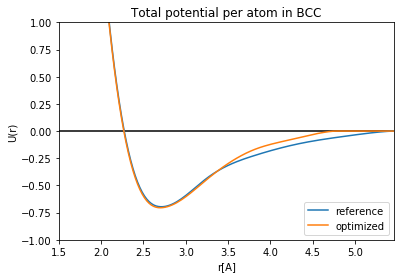

In [97]:
pot = [utot_re(x) for x in r]
pot_new = [utot_opt(x, pair_x, many_x) for x in r]

plt.title('Total potential per atom in BCC')
plt.plot(r, pot, label='reference')
plt.plot(r, pot_new, label='optimized')
plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'U(r)')

In [100]:
print('pair potentail parameters:', *pair_x)
print('embedding function parameters:', *many_x)

pair potentail parameters: -0.17418264522 7.68130608637 1.69215659358 0.897809491572 -0.939438008064 0.185815773878
embedding function parameters: -0.827564445229 0.0 2.22248338771e-05


In [101]:
pwd

'/Users/l2v/work/force_fields/sopt/notebooks'

In [105]:
pars_in = {'pair':pair_x, 'embed':many_x}
import pickle
with open('../data/working/pars_in.pickle', 'wb') as fo:
    pickle.dump(pars_in, fo)